# Working with Seaborn

Two types of plot objects:
- FacetGrid: Can create multiple subplots like catplot, relplot
- AxesSubplot: Only creates a single plot like scatterplot, countplot

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
countries_of_world = pd.read_csv('Datasets/countries-of-the-world.csv')
countries_of_world.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## Scatterplot

In [54]:
countries_of_world = countries_of_world.dropna()
phones = countries_of_world['Phones (per 1000)']
gdp = countries_of_world['GDP ($ per capita)']
percent_literate = countries_of_world['Literacy (%)']

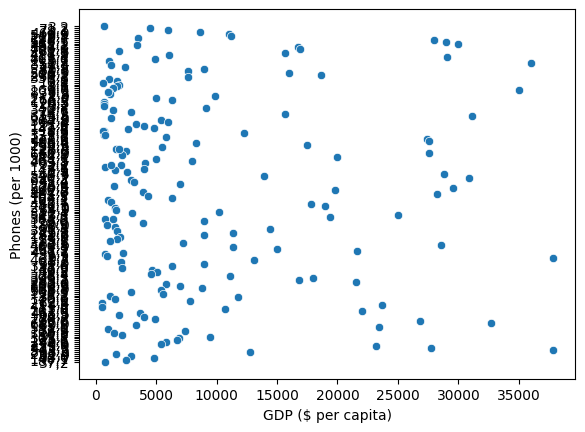

In [55]:
# fig = plt.figure(figsize=(8,12))
sns.scatterplot(x=gdp, y=phones)
plt.show()

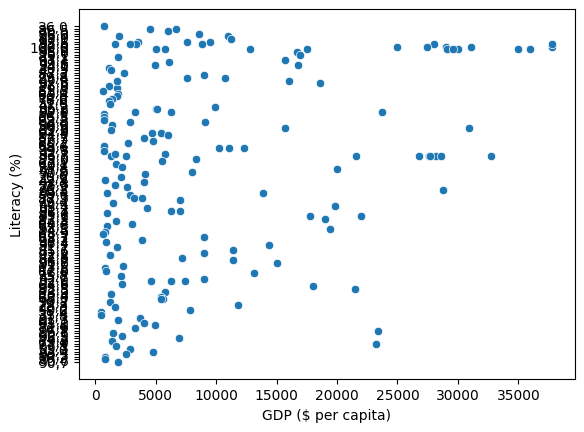

In [56]:
sns.scatterplot(x=gdp, y=percent_literate)
plt.show()

In [57]:
tips = sns.load_dataset('tips') # built-in dataset in seaborn
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### hue and hue_order

[]

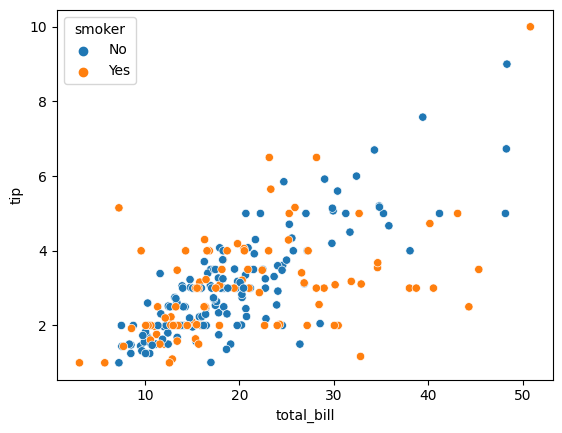

In [58]:
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='smoker', hue_order=['No','Yes'])
plt.plot()

### palette

[]

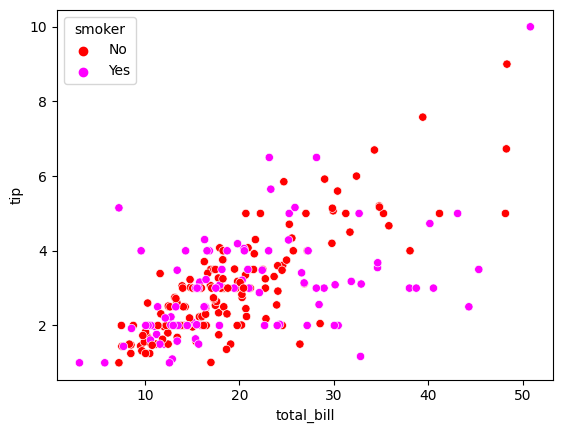

In [59]:
hue_colors={'No':'Red','Yes':'Magenta'}
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='smoker', hue_order=['No','Yes'], palette=hue_colors)
plt.plot()

[]

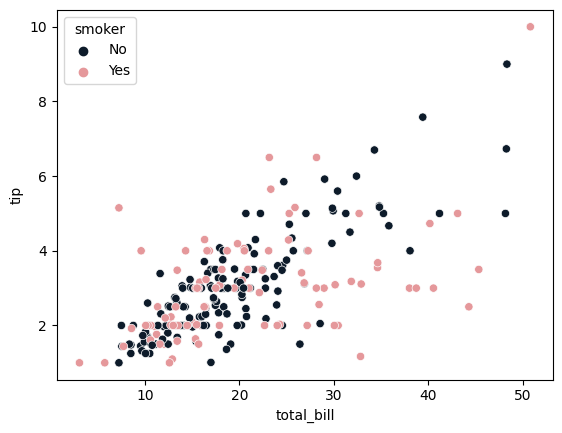

In [60]:
# using html hex color codes

hue_colors={'No':'#0d1b2a','Yes':'#e5989b'}
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='smoker', hue_order=['No','Yes'], palette=hue_colors)
plt.plot()

## Countplot

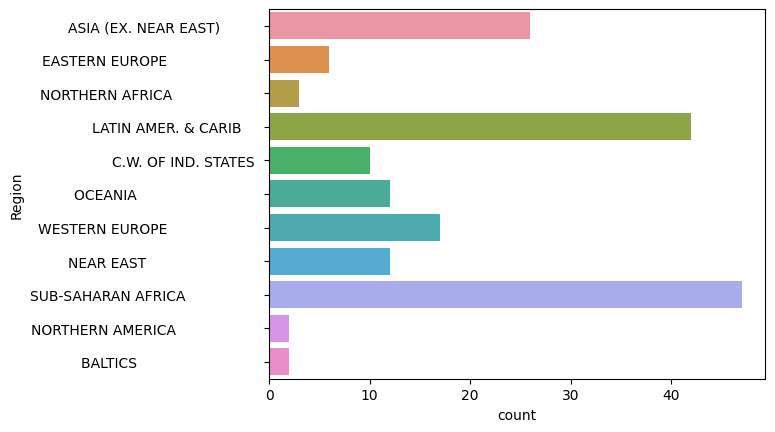

In [61]:
region = countries_of_world['Region']
sns.countplot(y=region)
plt.show()

## relplot or Relational Plots

Major advantage over scatter or line plot that it can create subplots

### col 

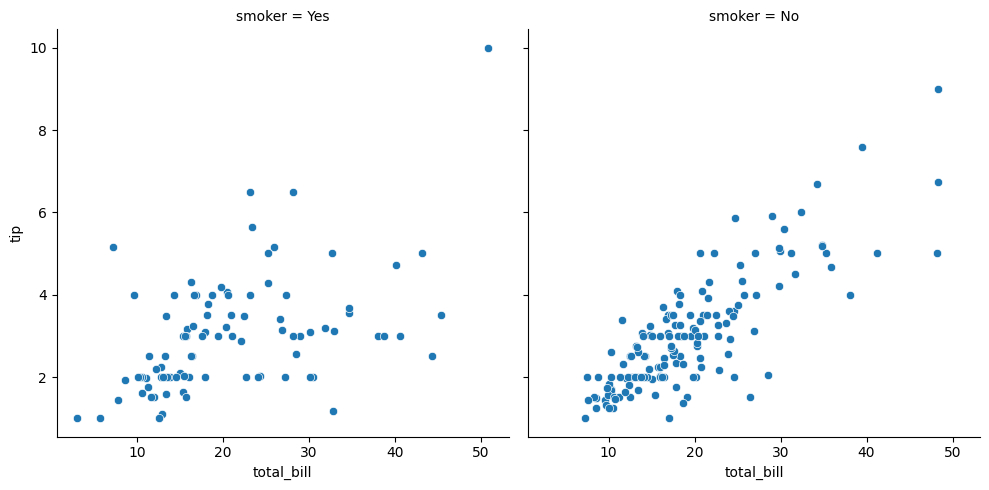

In [62]:
sns.relplot(x='total_bill', y='tip', data=tips, kind='scatter', col='smoker')
plt.show()

### row

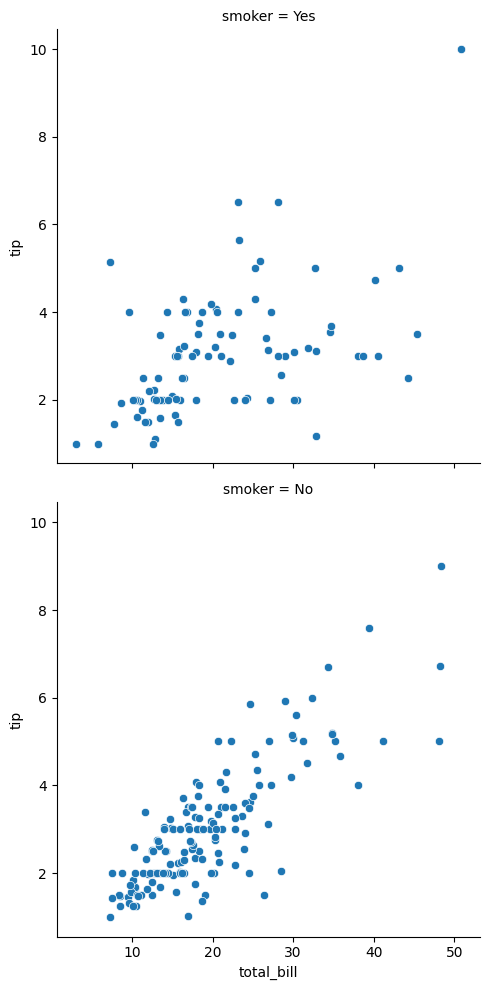

In [63]:
sns.relplot(x='total_bill', y='tip', data=tips, kind='scatter', row='smoker')
plt.show()

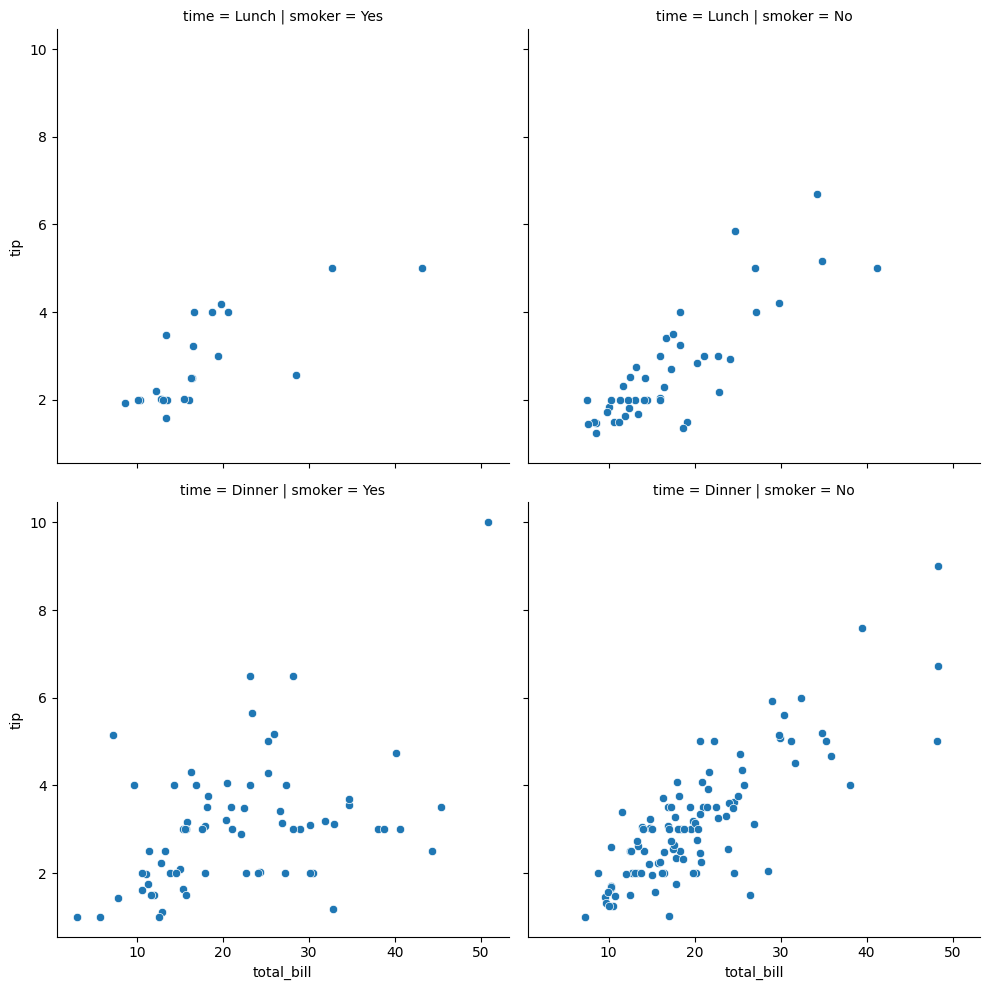

In [64]:
sns.relplot(x='total_bill', y='tip', data=tips, kind='scatter', col='smoker', row='time')
plt.show()

### col_wrap

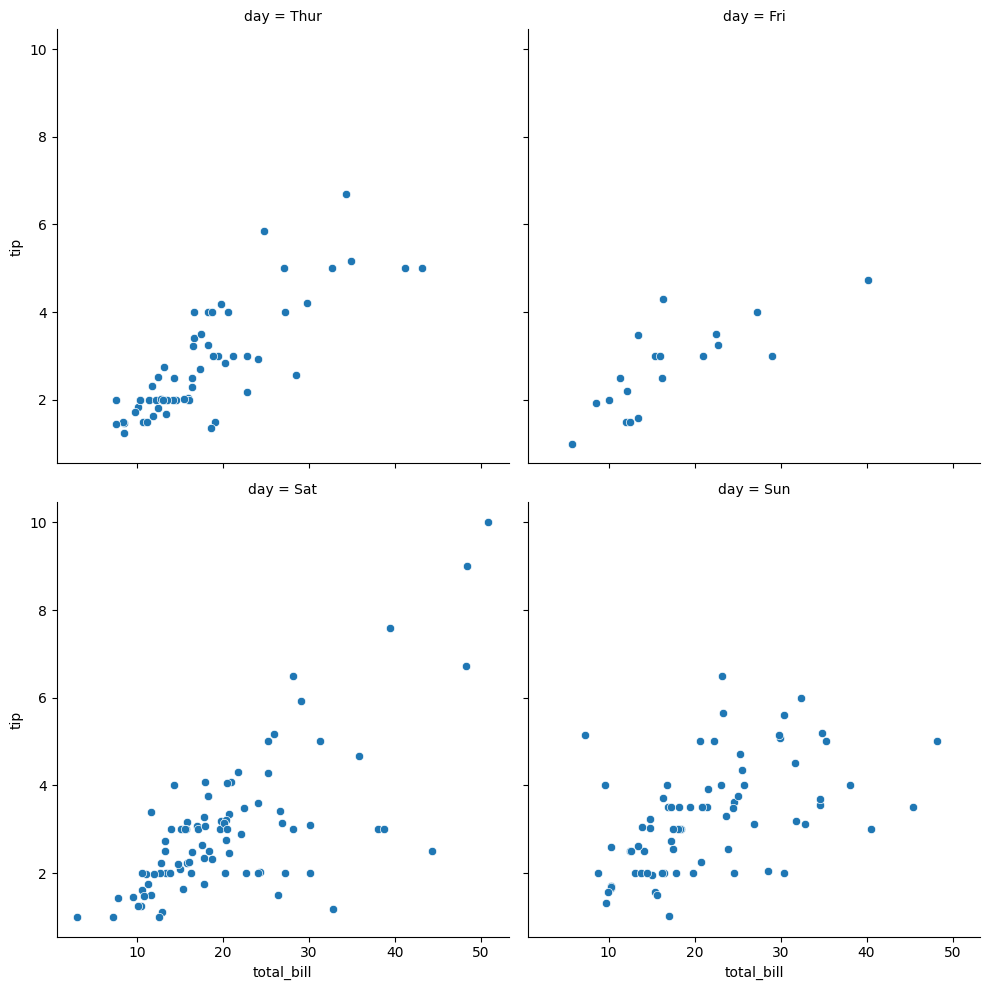

In [65]:
sns.relplot(x='total_bill', y='tip', data=tips, kind='scatter', col='day', col_wrap=2)
plt.show()

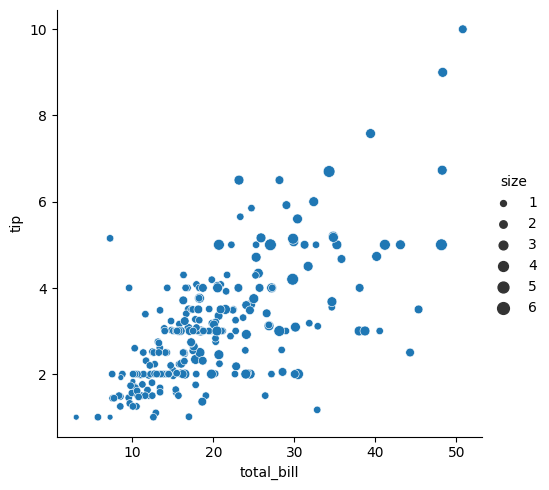

In [66]:
sns.relplot(x='total_bill', y='tip', data=tips, kind='scatter', size="size")
plt.show()

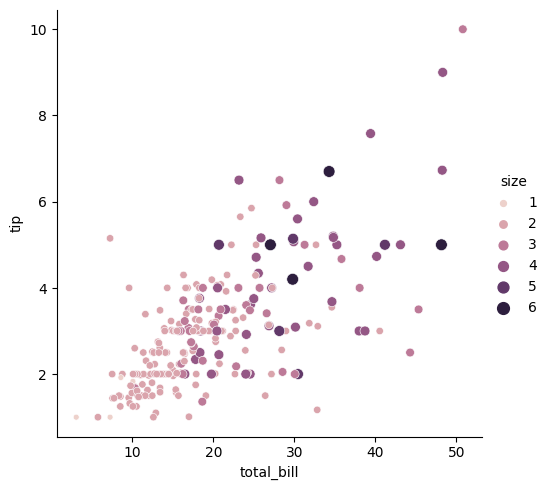

In [67]:
sns.relplot(x='total_bill', y='tip', data=tips, kind='scatter', size="size", hue="size")
plt.show()

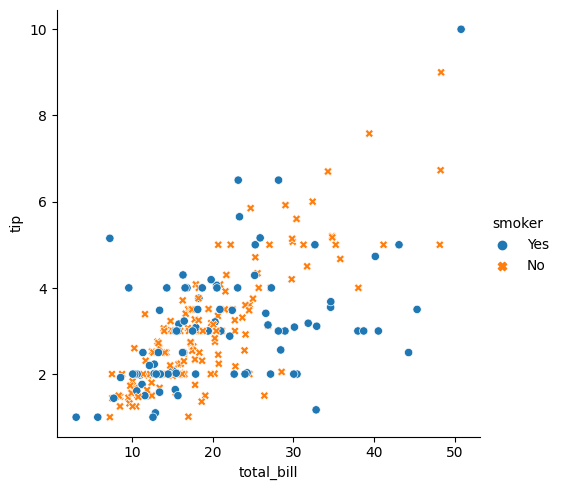

In [68]:
sns.relplot(x='total_bill', y='tip', data=tips, kind='scatter', hue="smoker", style="smoker")
plt.show()

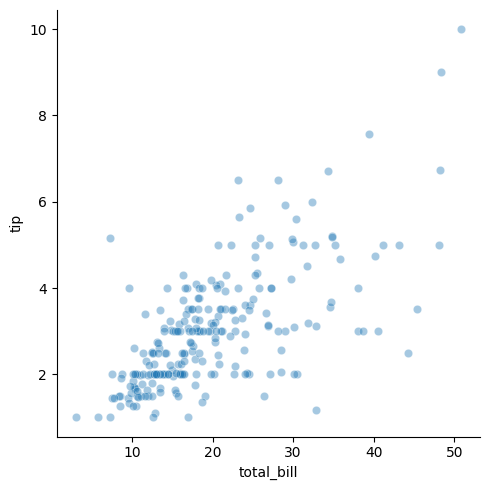

In [69]:
sns.relplot(x='total_bill', y='tip', data=tips, kind='scatter', alpha=0.4)
plt.show()

## Line Plot

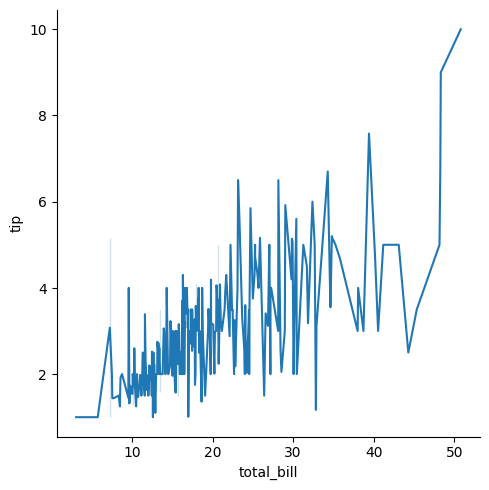

In [70]:
sns.relplot(x='total_bill', y='tip', data=tips, kind='line')
plt.show()

## catplot or Categorical Plots

### Count Plot

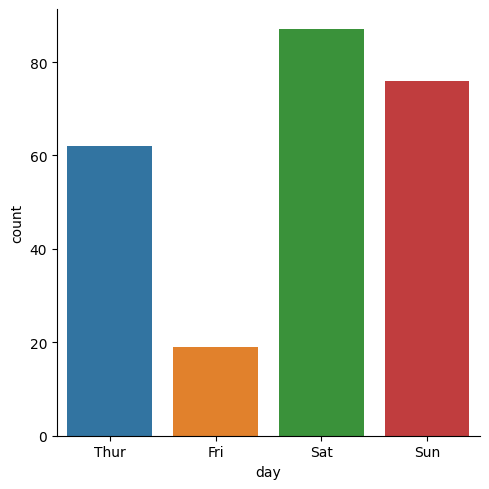

In [71]:
sns.catplot(x="day", data=tips, kind="count")
plt.show()

#### order

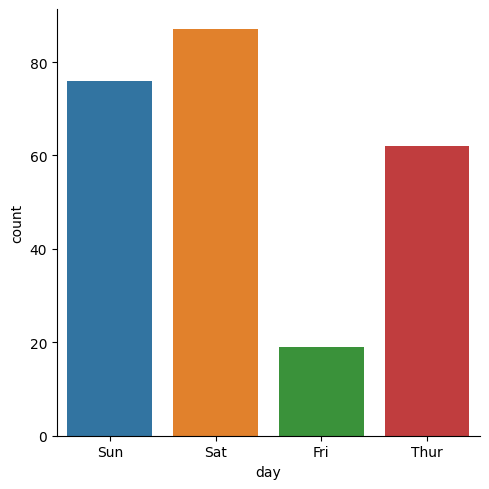

In [72]:
category_order=["Sun","Sat","Fri","Thur"]
sns.catplot(x="day", data=tips, kind="count",order=category_order)
plt.show()

### Barplot

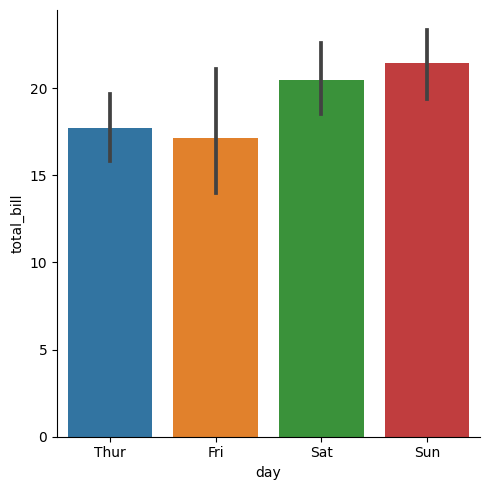

In [73]:
sns.catplot(x="day", y="total_bill", data=tips, kind="bar")
plt.show()

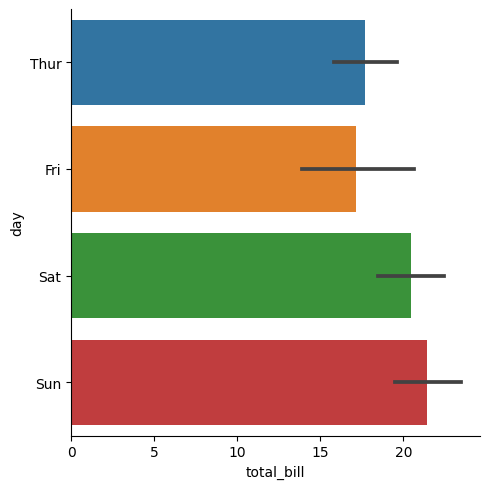

In [74]:
sns.catplot(x="total_bill", y="day", data=tips, kind="bar")
plt.show()

### Box Plot
A box plot shows the distribution of quantitative data. The colored box represents the 25th to 75th percentile, and the line in the middle of the box represents the median.

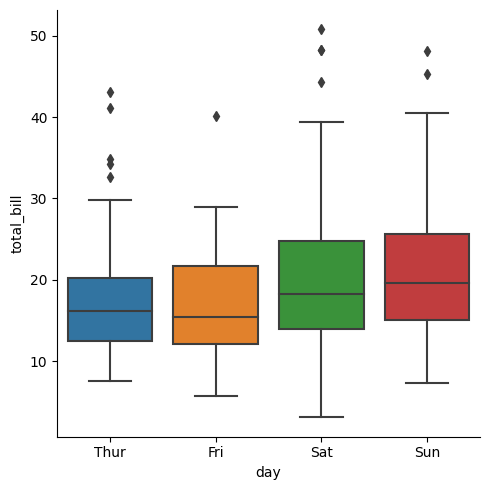

In [75]:
sns.catplot(x="day", y="total_bill", data=tips, kind="box")
plt.show()

#### sym
helps in changing outliers

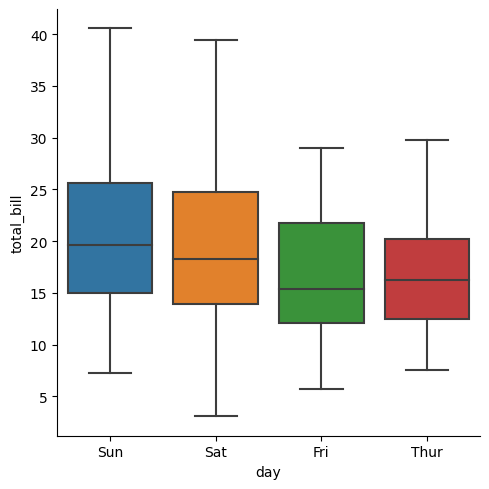

In [76]:
category_order=["Sun","Sat","Fri","Thur"]
sns.catplot(x="day", y="total_bill", data=tips, kind="box", order=category_order, sym="")
plt.show()

### Point plots
Diff b/w line and point:
- Line is quantative
- Point is Categorical

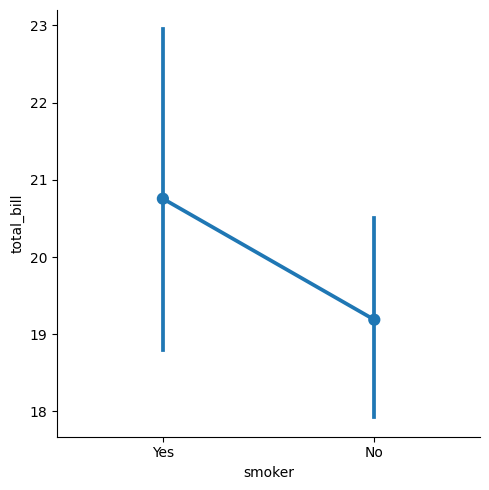

In [77]:
sns.catplot(x="smoker", y="total_bill", data=tips, kind="point")
plt.show()

#### join

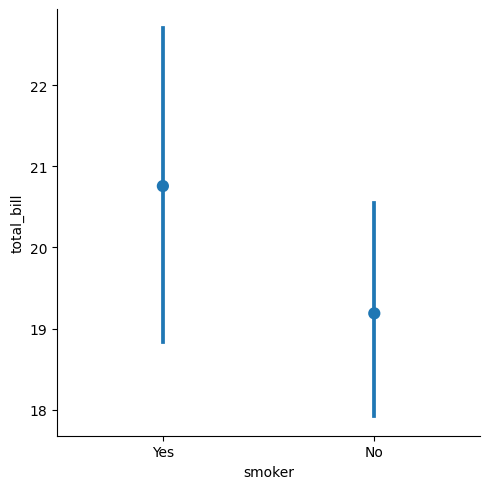

In [78]:
sns.catplot(x="smoker", y="total_bill", data=tips, kind="point", join=False)
plt.show()

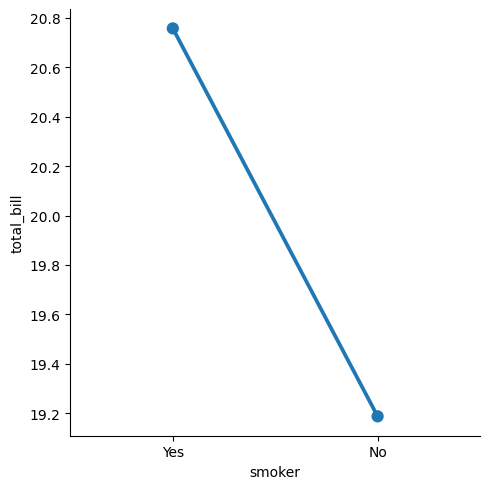

In [79]:
sns.catplot(x="smoker", y="total_bill", data=tips, kind="point", errorbar=None)
plt.show()

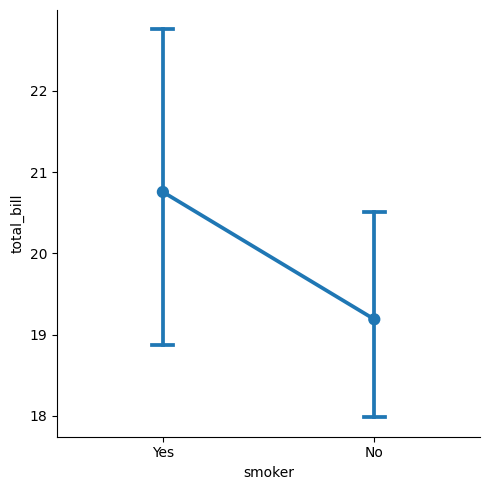

In [80]:
sns.catplot(x="smoker", y="total_bill", data=tips, kind="point", capsize=0.1)
plt.show()